In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% ! important;}
div.cell.code_cell.rendered{width:100%}
div.input_prompt{padding:0px}
div.CodeMirror {font-family:Consolas ; font-size:12pt;}
div.text_cell_render.rendered_html {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold}
div.input {font-family:Consolas ; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper {padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red">ch.12 데이터 시각화</font></b>
- 시각화 라이브러리 : matplotlib, seaborn, folium(지도시각화)
- matplotlib : 파이썬에서 가장 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함
- seaborn : matplotlib 기반으로 다양한 색, 테마, 차트 기능. groupby 기능 추가한 라이브러리
# 1절 matplotlib
- https://pypi.org/project/matplotlib/
- https://matplotlib.org/stable/api/pyplot_summary.html
## 1.1 패키지 import 및 기본 설정

In [3]:
import matplotlib
matplotlib.__version__

'3.7.0'

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
# 한글기본설정(windows mac)
plt.rc('font', family='Malgun Gothic') # 윈도우즈
# plt.('font', family='Apple Gothic')  #mac
plt.rc('axes', unicode_minus=False) # 축의 - 꺠짐 방지
# warnig을 안보이게
import warnings
warnings.filterwarnings(action='ignore') # warning 안 보이게

## 1.2 그래프 그리기
- matplolib으로 그래프 그리기
    1) 데이터 준비하기 <br>
    2) 그래프 생성 <br>
    3) 그래프 함수로 그리기 <br>
    4) 그래프 커스터마이징 <br>
    5) 그래프 출력 및 저장<br>

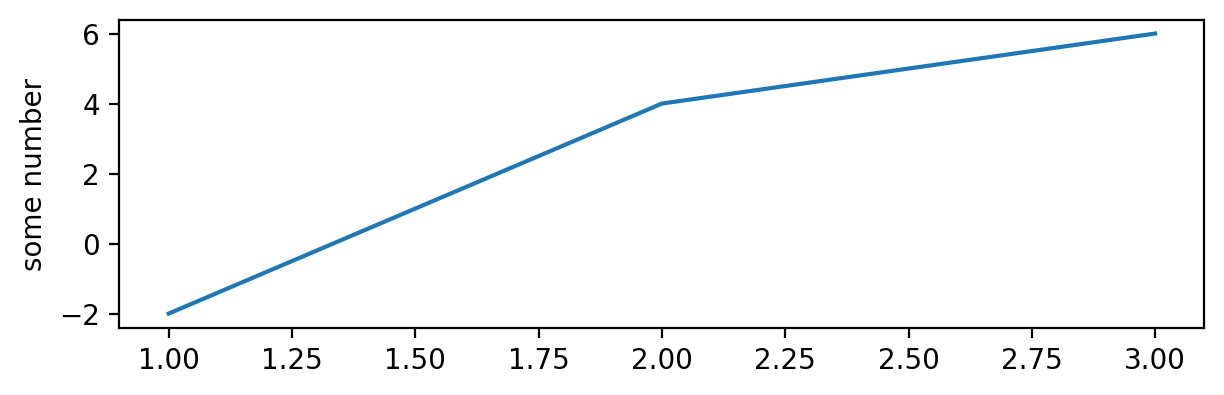

In [19]:
x=[1, 2, 3] # 1)
y=[-2, 4, 6] 
plt.figure(figsize=(7,2)) # 2) 그래프 객체 생성(사이즈는 인치)
plt.plot(x,y) # 3)
plt.ylabel('some number') # 4)커스터마이징
# plt.show() # 5) 출력
plt.savefig('data/ch12.png') # 파일 출력

## 1.3 그래프 영역 나누기
### 1) subplot()함수로 서브플롯 추가

In [5]:
import numpy as np
x = np.arange(0,10,0.1) #x = np.linspace(0,9.9,100)
x.shape

(100,)

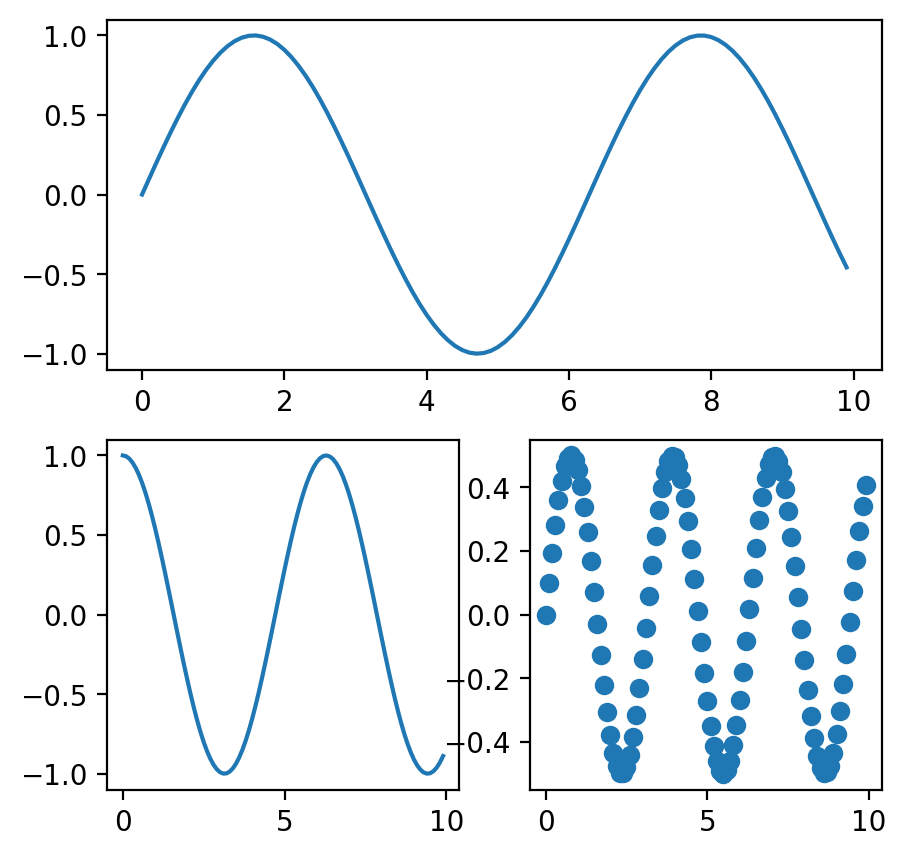

In [30]:
plt.figure(figsize=(5,5))
plt.subplot(2,1,1) # 2행 1열로 subplot에서 1번째 subplot은 다음과 같이 그린다.
plt.plot(x, np.sin(x))
plt.subplot(2,2,3) # 2행 2열 subplot중 3번째 subplot
plt.plot(x, np.cos(x))
plt.subplot(224) # 2행 2열 subplot 중 4번째 subplot
plt.scatter(x, np.sin(x)*np.cos(x))
plt.show()

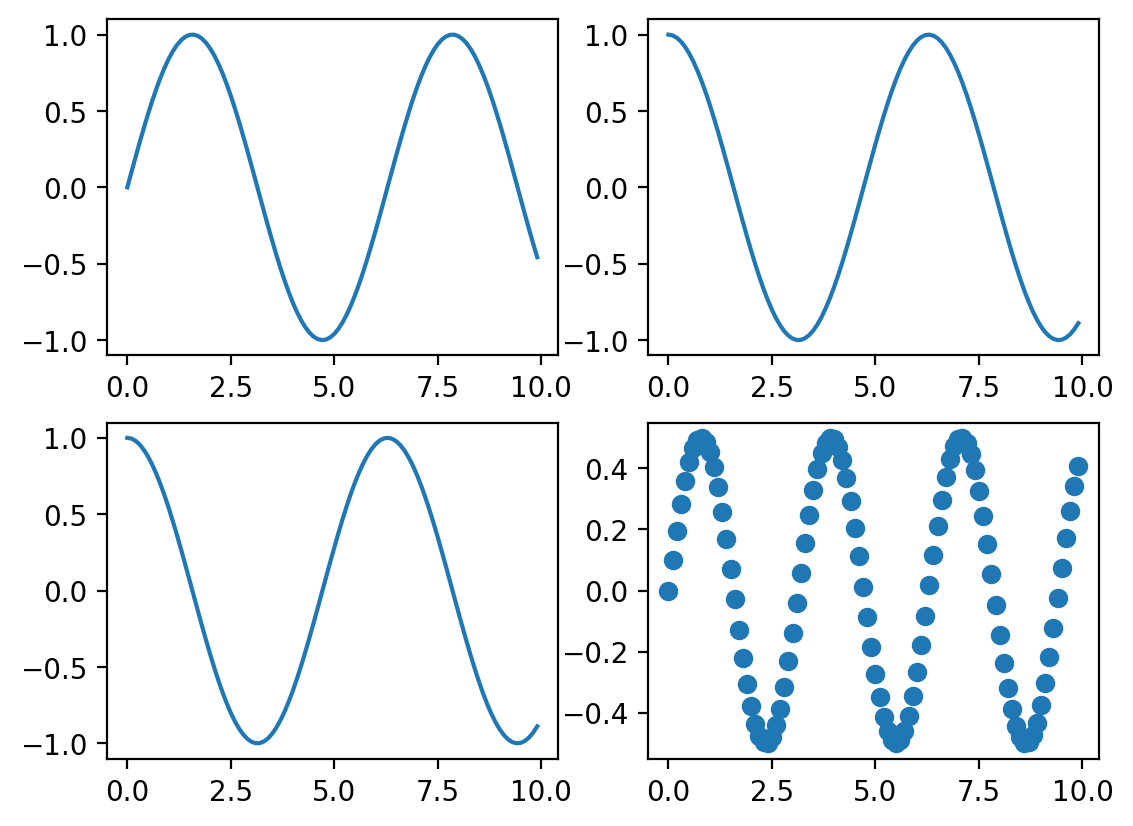

In [31]:
plt.subplot(2,2,1) 
plt.plot(x, np.sin(x))
plt.subplot(2,2,2)
plt.plot(x, np.cos(x))
plt.subplot(2,2,3) 
plt.plot(x, np.cos(x))
plt.subplot(224) 
plt.scatter(x, np.sin(x)*np.cos(x))
plt.show()

### 2) subplots() 함수로 서브플롯 추가
- plot함수에 색상이나 스타일 조정(교안 14page) https://wikidocs.net/92085

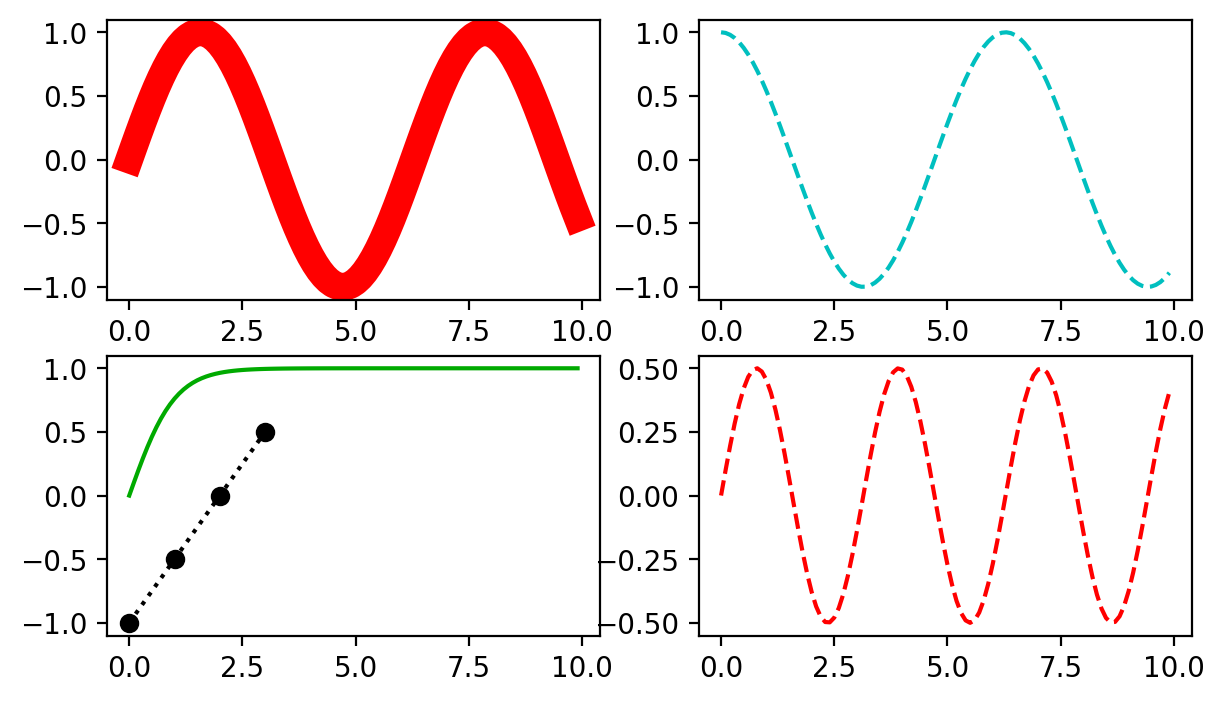

In [48]:
# 2행 2열 서브플롯
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(7,4))
axes[0,0].plot(x,np.sin(x),c='r', linewidth=10)
axes[0,1].plot(x, np.cos(x), 'c--') #c='c', linestyle='--'
axes[1,0].plot(x,np.tanh(x), '#00AA00')
axes[1,0].plot([0,1,2,3],[-1,-0.5,0,0.5],'ko:') # k: black, marker='o', linestyle=':'
axes[1,1].plot(x, np.sin(x)*np.cos(x), 'r--')
plt.show()

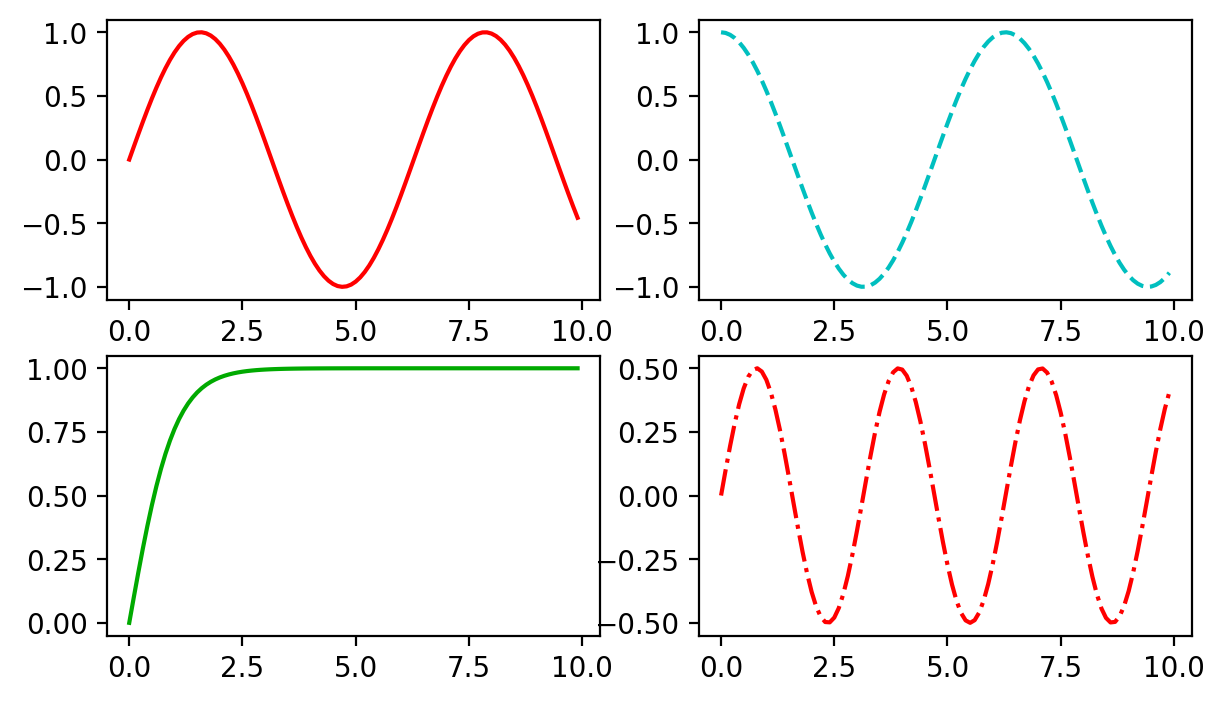

In [55]:
 # 2행 2열 서브플롯(for)
func = [np.sin, np.cos, np.tanh, lambda x : np.sin(x)*np.cos(x)]
fmt = ['r','c--','#00AA00', 'r-.']
fig, axes = plt.subplots(2,2,figsize=(7,4))
list(enumerate(axes.flat))
for i, ax in enumerate(axes.flat):
    ax.plot(x, func[i](x),fmt[i])

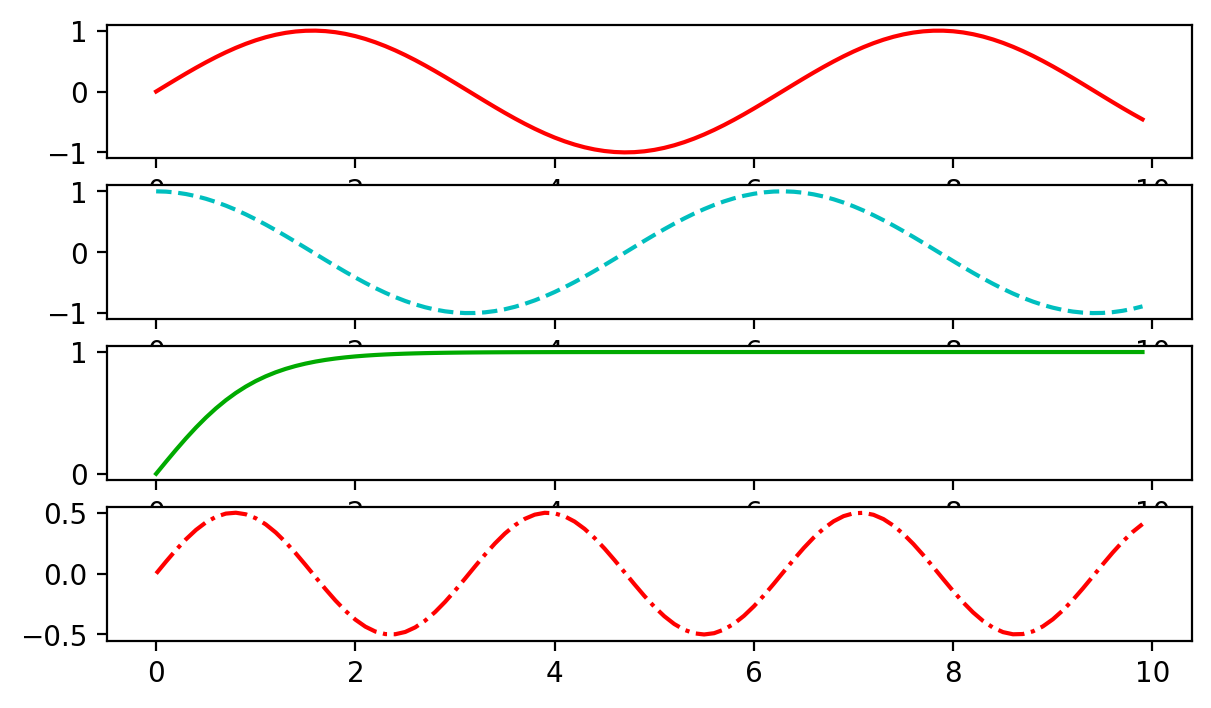

In [56]:
 # 4행 1열 서브플롯(for)
func = [np.sin, np.cos, np.tanh, lambda x : np.sin(x)*np.cos(x)]
fmt = ['r','c--','#00AA00', 'r-.']
fig, axes = plt.subplots(4,1,figsize=(7,4))
for i, ax in enumerate(axes):
    ax.plot(x, func[i](x),fmt[i])

## 1.4 다양한 그래프 그리기
### 1) pyplot 함수들(교안 16page) https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html

### 2) matplotlib.pyplot.plot() : 선그래프

### 3) pandas.DataFrame.plot()
- plt.______(x,y,fmt)
- df.plot(x=None,y=None,kind='line', figsize=None, title=None, grid=None)
    * kind : line(기본값),scatter(점도표), bar, barh, density, hist, pie(한컬럼만).....

- 교안 21page https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례사용

In [7]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


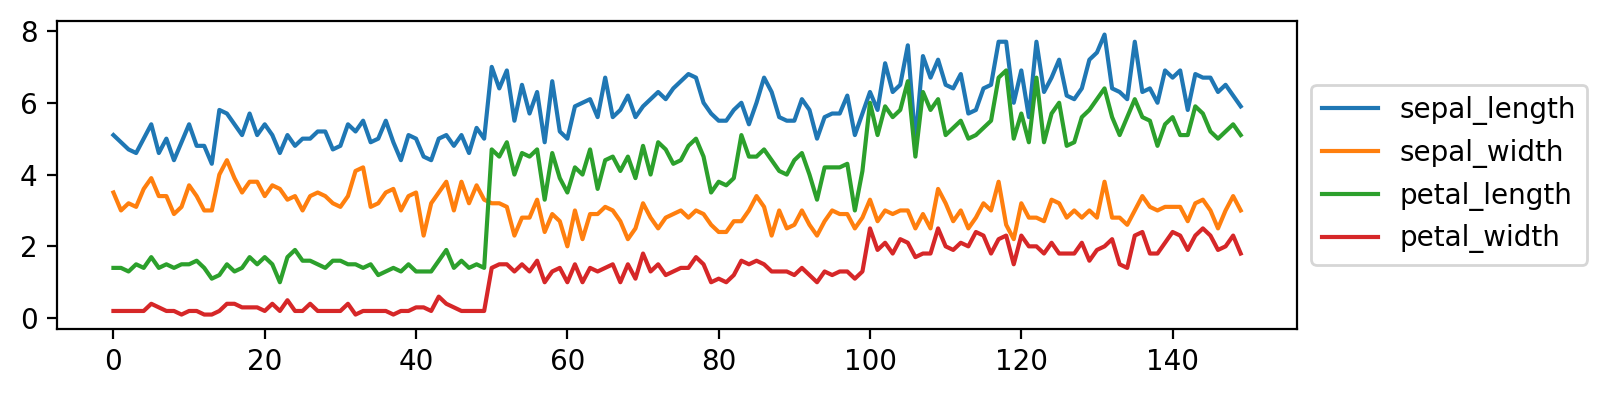

In [12]:
ax=iris.plot(kind='line',figsize=(8,2))
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

- https://matplotlib.org/stable/users/explain/colors/colormaps.html : colormap (교안 21page)

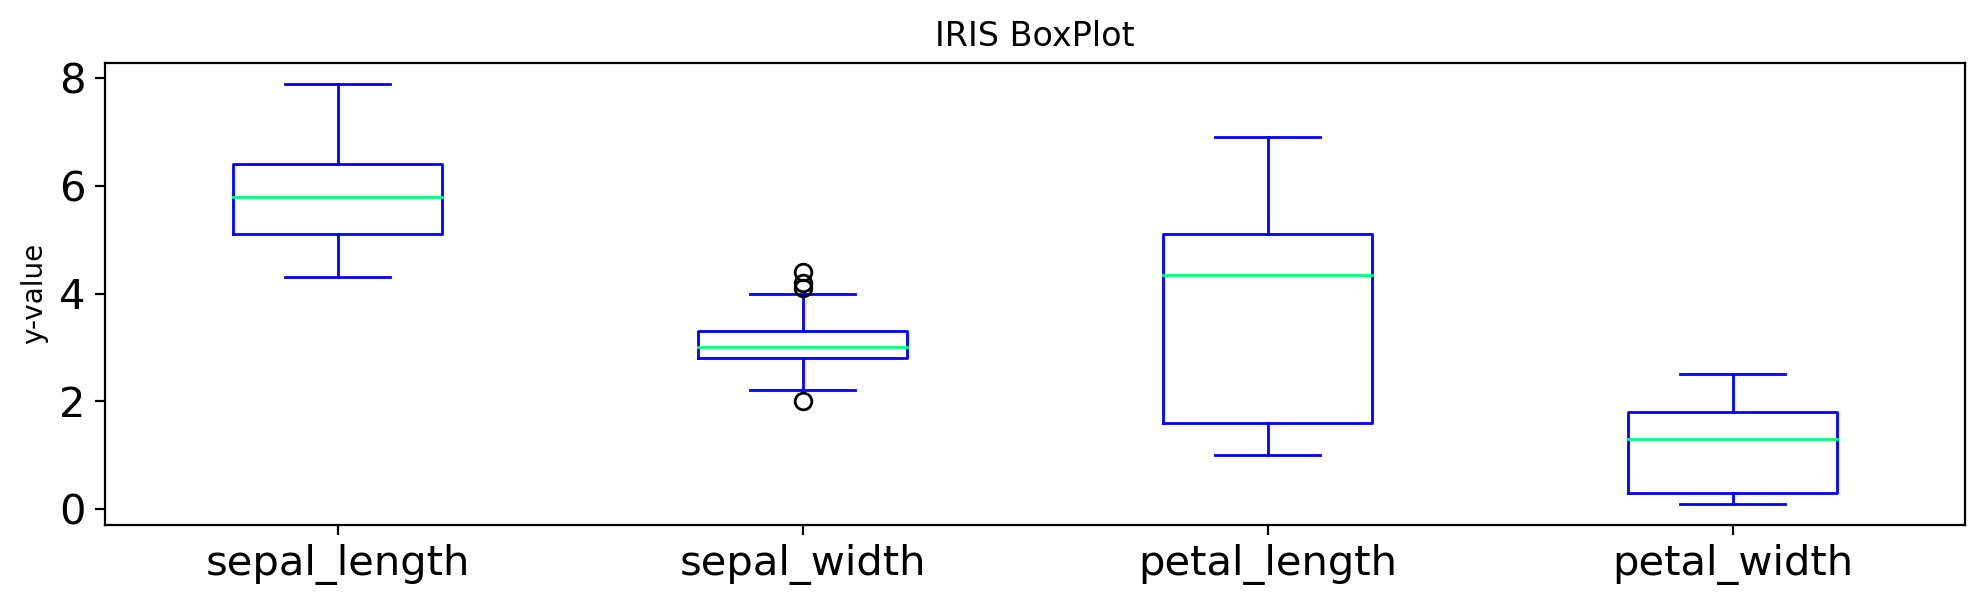

In [15]:
iris.plot(kind='box', figsize=(12,3), title = 'IRIS BoxPlot', ylabel='y-value', fontsize=15, colormap='winter')
plt.show()

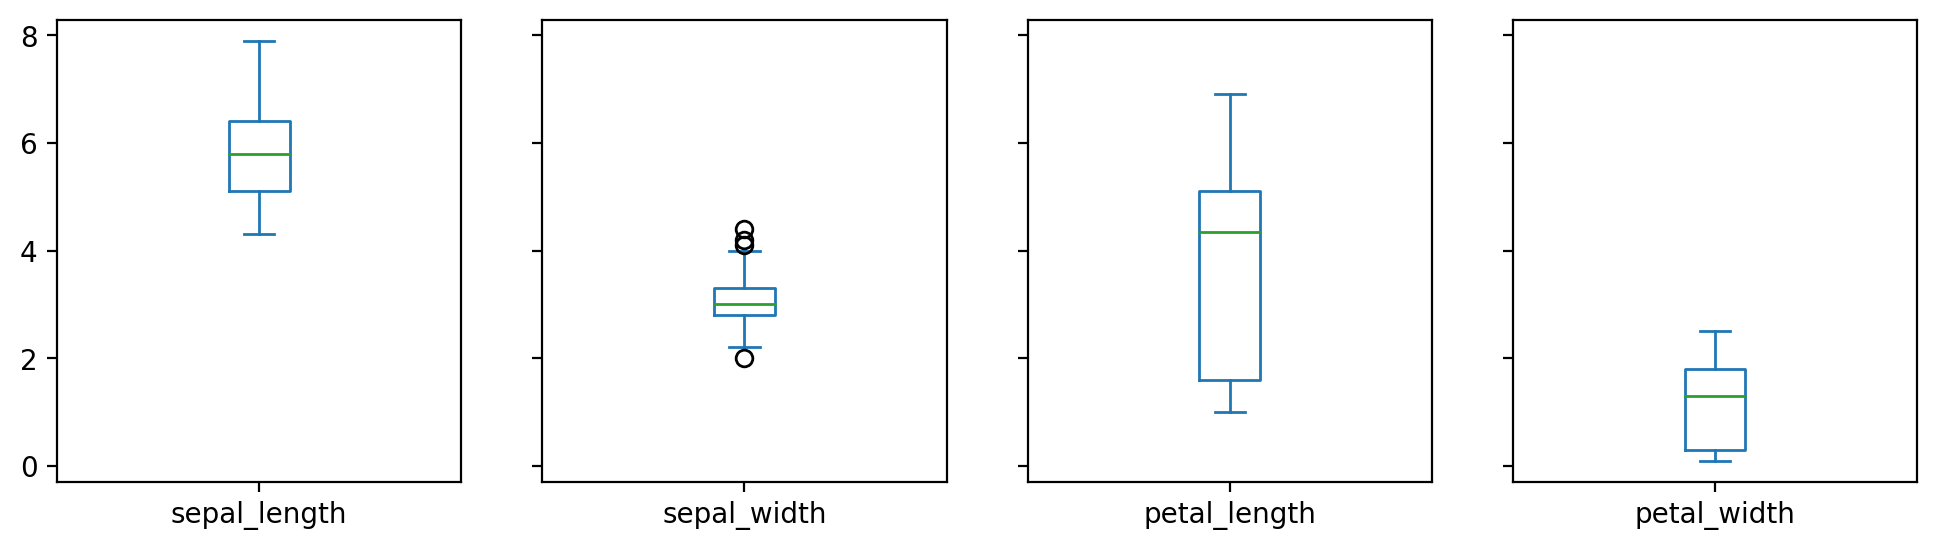

In [18]:
iris.plot(kind='box', figsize=(12,3),subplots=True, sharey=True)
plt.show()

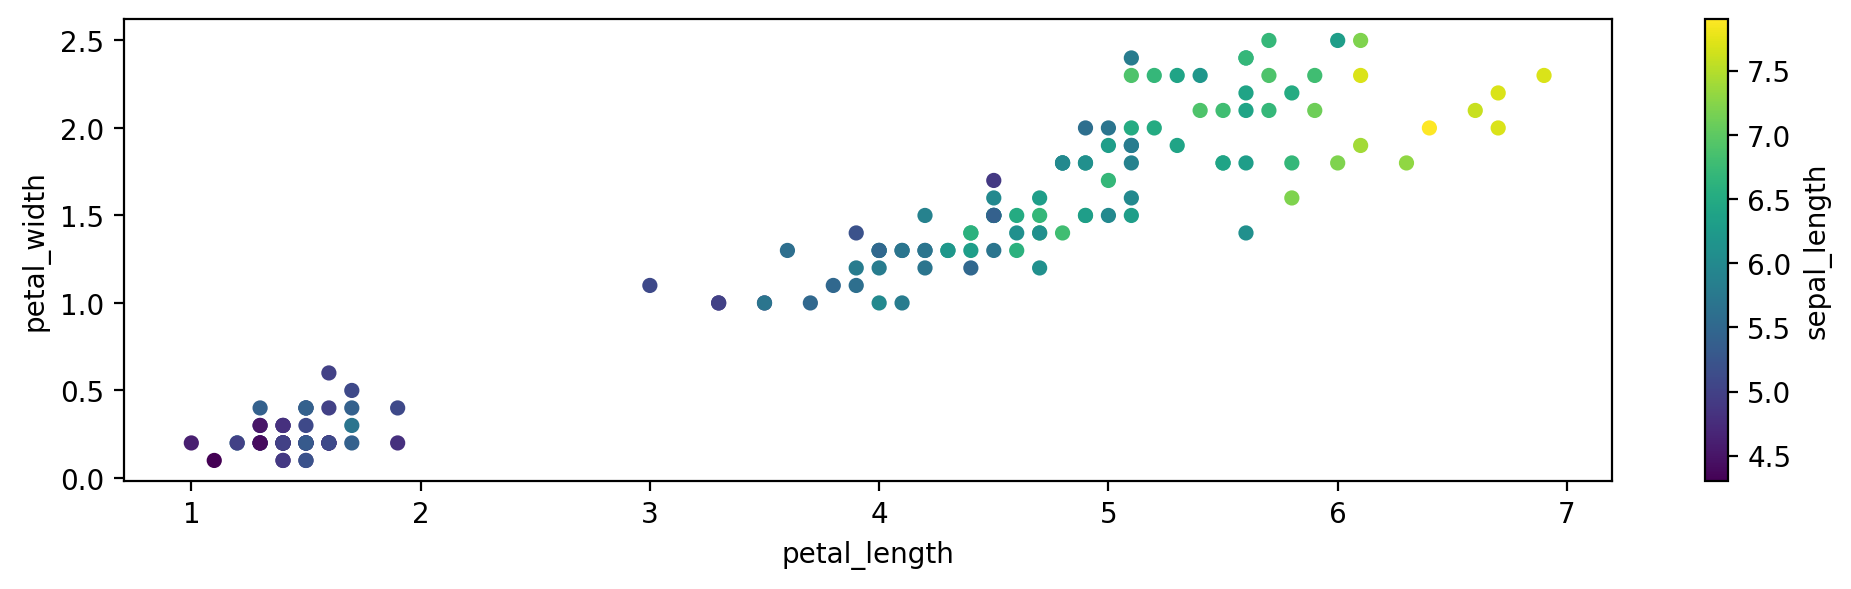

In [23]:
iris.plot(kind='scatter',x='petal_length',y='petal_width', figsize=(12,3), c= 'sepal_length')
plt.show()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,"Axes(0.125,0.653529;0.168478x0.226471)","Axes(0.327174,0.653529;0.168478x0.226471)","Axes(0.529348,0.653529;0.168478x0.226471)","Axes(0.731522,0.653529;0.168478x0.226471)"
versicolor,"Axes(0.125,0.653529;0.168478x0.226471)","Axes(0.327174,0.653529;0.168478x0.226471)","Axes(0.529348,0.653529;0.168478x0.226471)","Axes(0.731522,0.653529;0.168478x0.226471)"
virginica,"Axes(0.125,0.653529;0.168478x0.226471)","Axes(0.327174,0.653529;0.168478x0.226471)","Axes(0.529348,0.653529;0.168478x0.226471)","Axes(0.731522,0.653529;0.168478x0.226471)"


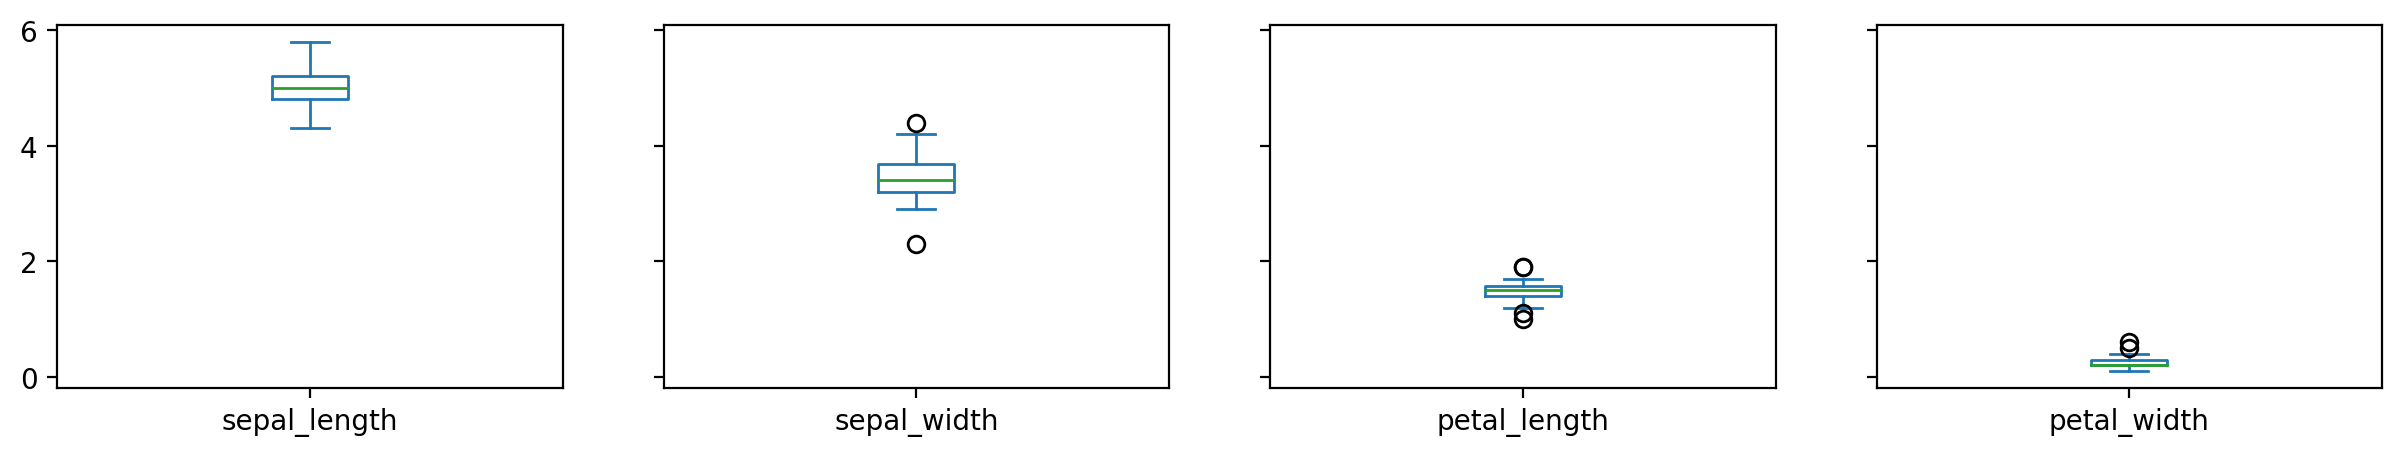

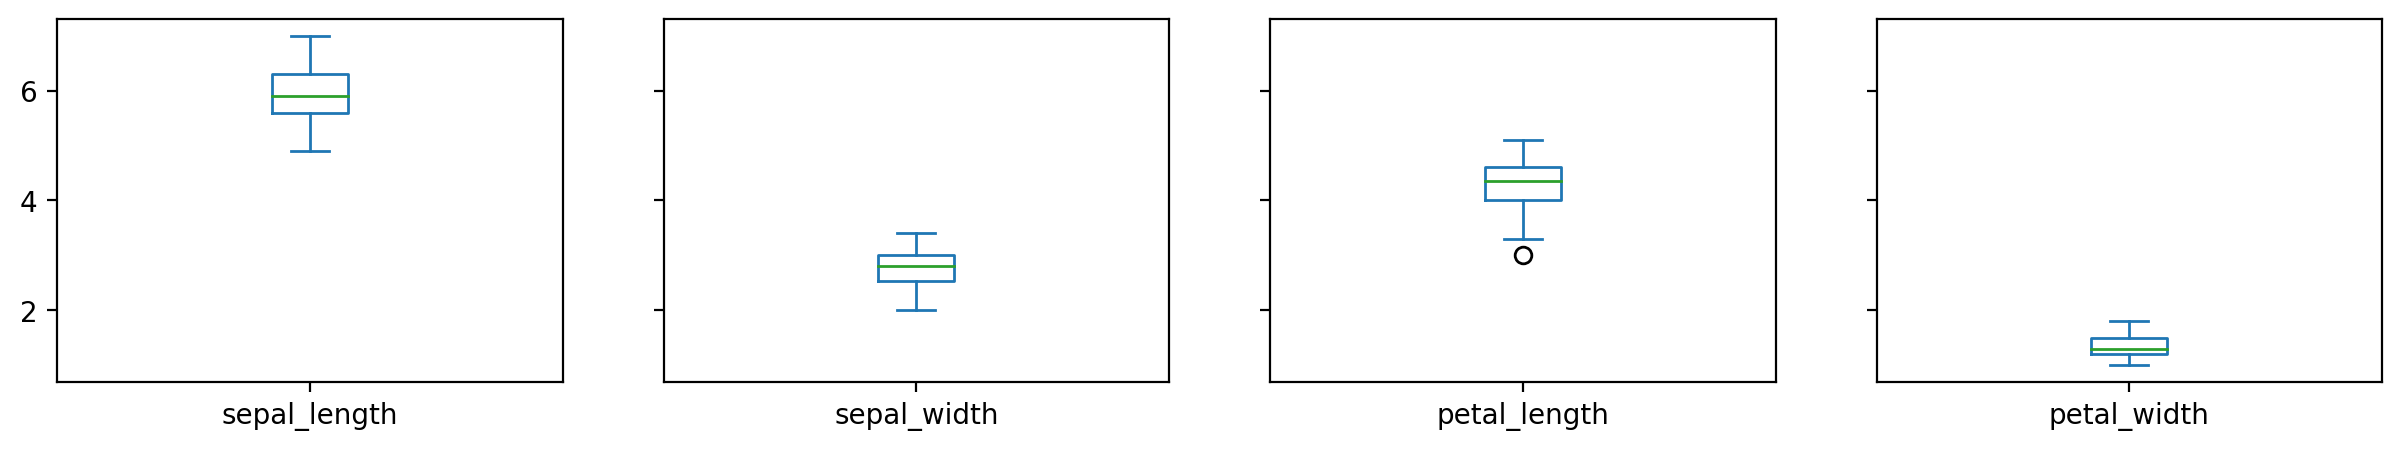

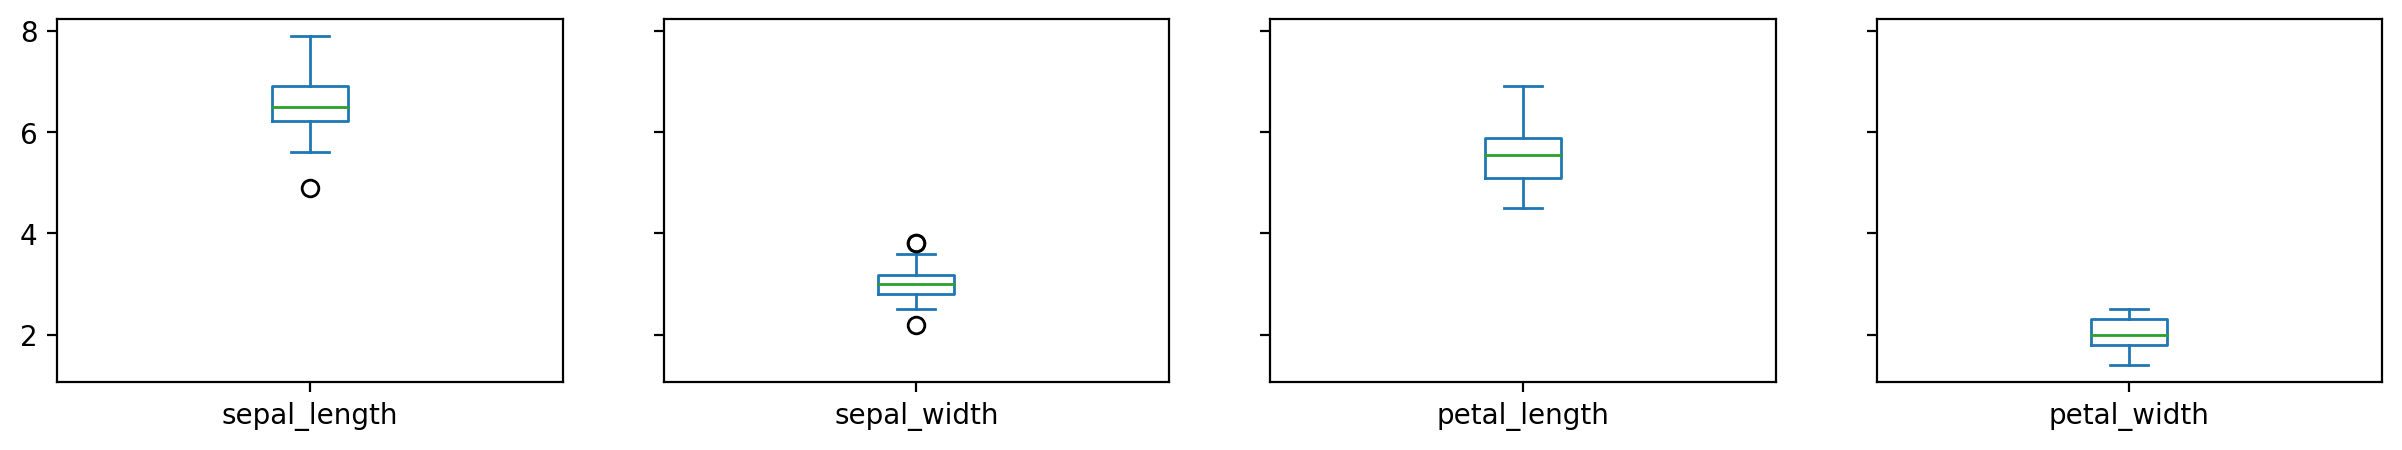

In [28]:
# 종별 boxplot
iris.groupby('species').plot(kind='box', figsize=(15,8),subplots=True, layout=(3,4),sharey=True)

### 4) plt.scatter() : 산점도

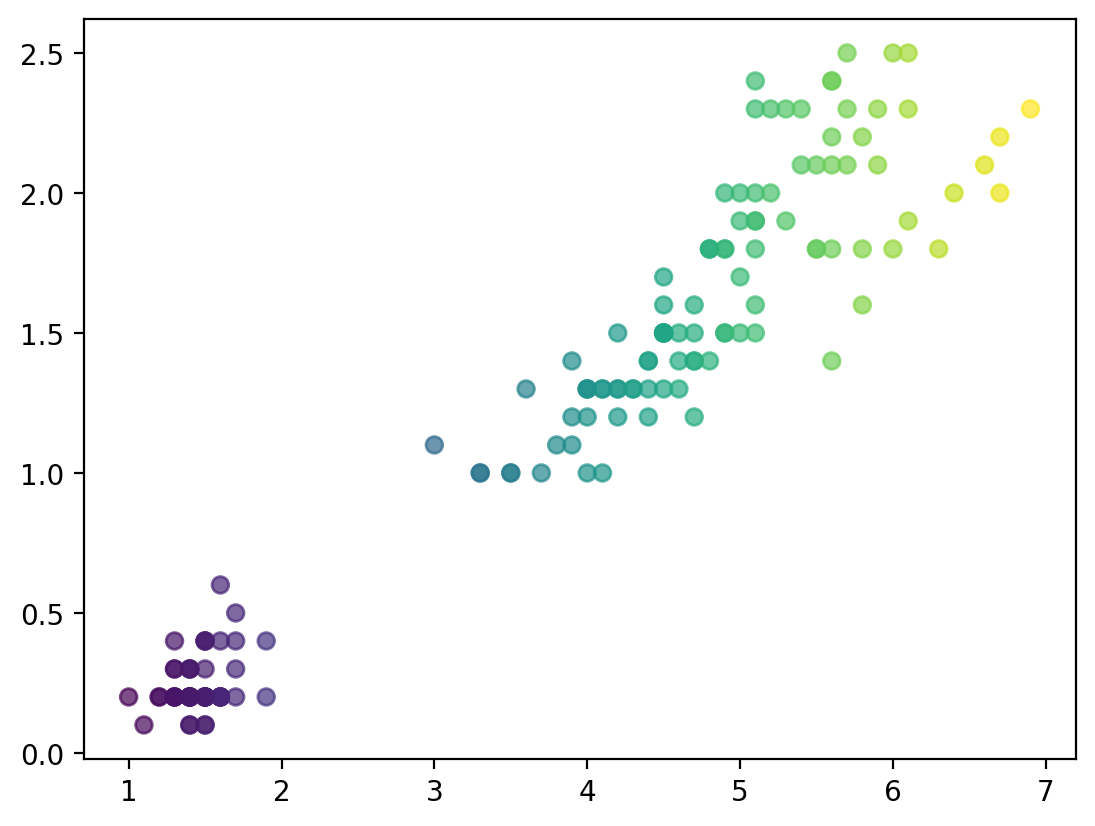

In [29]:
plt.scatter(iris.petal_length, iris.petal_width, c=iris.petal_length*20, alpha=0.7)

## 1.5 그 외 그래프 그리기
### 1) boxplot(분포를 표시하진 않음) vs violinplt
- https://www.research.autodesk.com/publications/same-stats-different-graphs/ 동일한 통계, 다른 그래프(교안 1page)

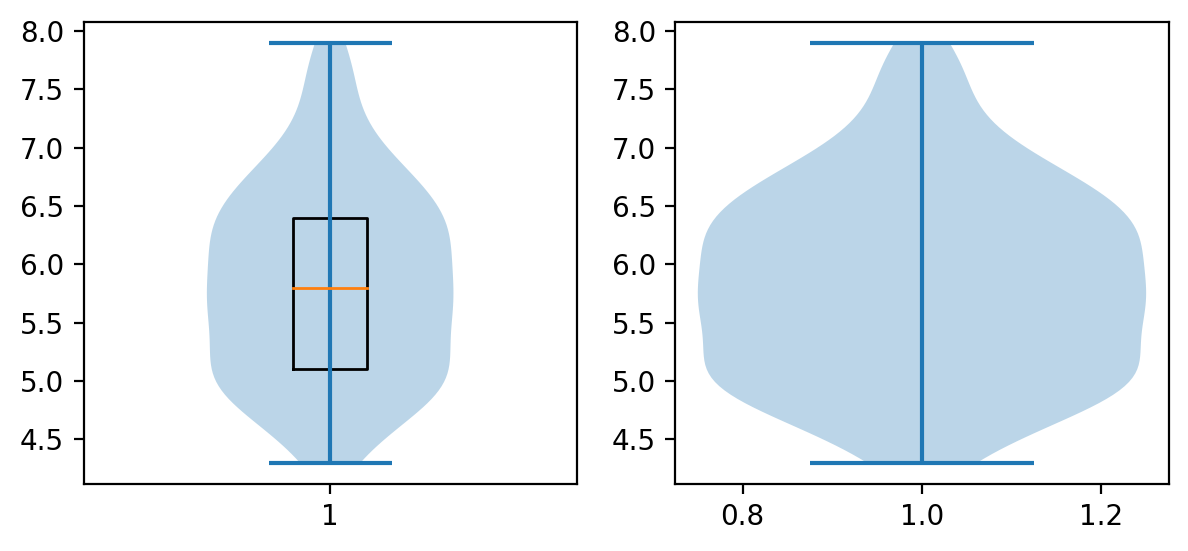

In [36]:
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
axes[0].boxplot(iris.sepal_length)
axes[0].violinplot(iris.sepal_length)
axes[1].violinplot(iris.sepal_length)
plt.show()

### 2) bar(), barh()

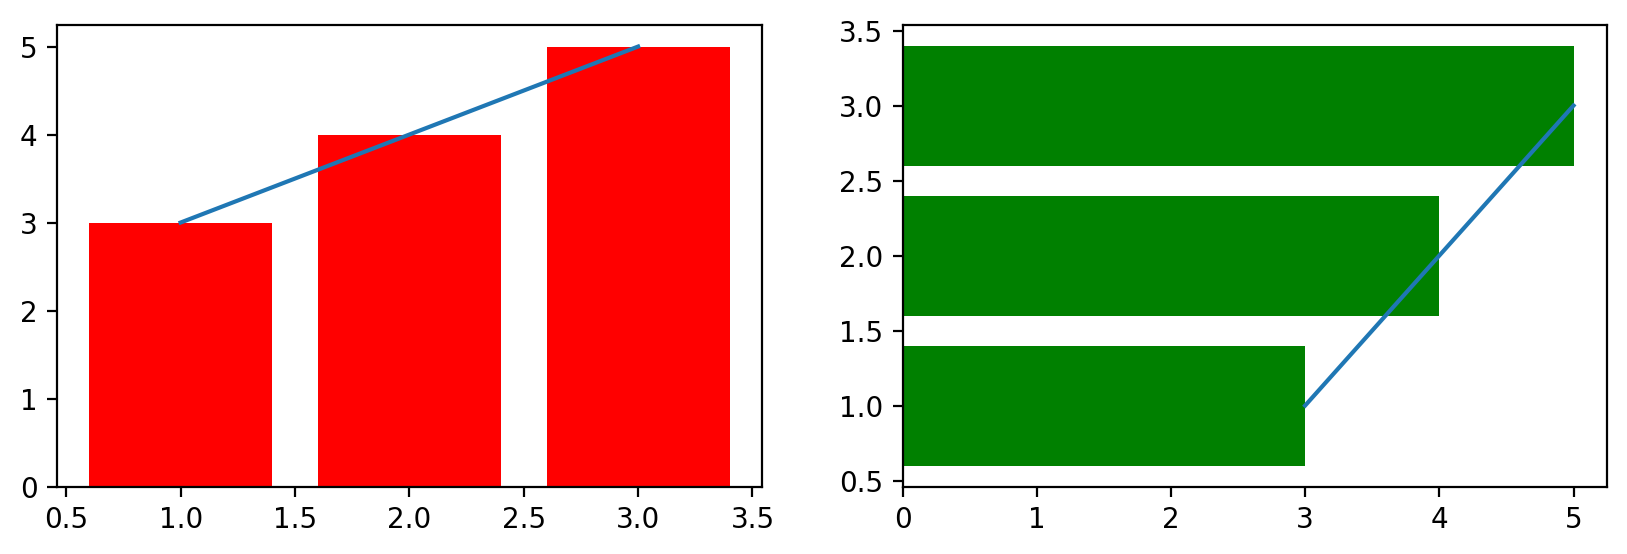

In [43]:
x = [1, 2, 3]
y = [3, 4, 5]
fig, axes = plt.subplots(ncols=2, figsize=(10,3))
axes[0].bar(x, y, color='r')
axes[0].plot(x,y)
axes[1].barh(x,y,color='g')
axes[1].plot(y,x)
plt.show()

### 3) hist(도수분포표, 히스토그램)

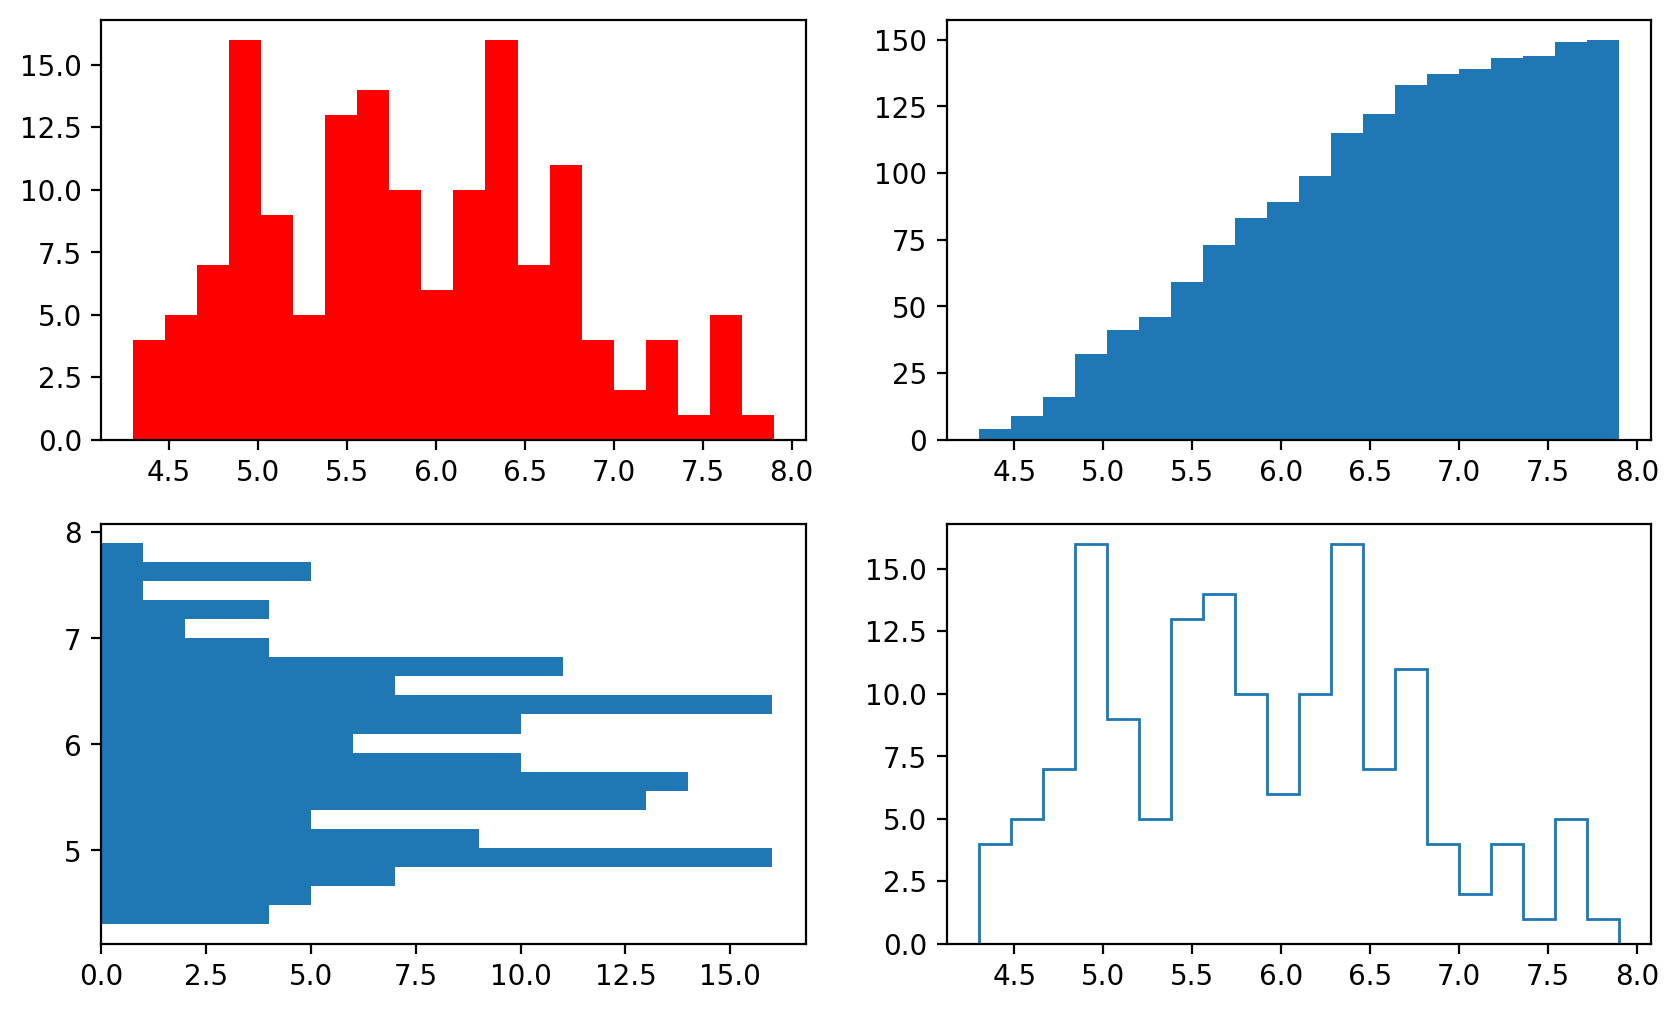

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
axes[0,0].hist(iris.sepal_length, bins=20, color='r') # 히스토그램
axes[0,1].hist(iris.sepal_length, bins=20, cumulative=True) # 누적 히스토그램
axes[1,0].hist(iris.sepal_length, bins=20, orientation='horizontal')
axes[1,1].hist(iris.sepal_length, bins=20, histtype='step')
plt.show()

### 4) axvline(),axhline(), fill(), fill_between()

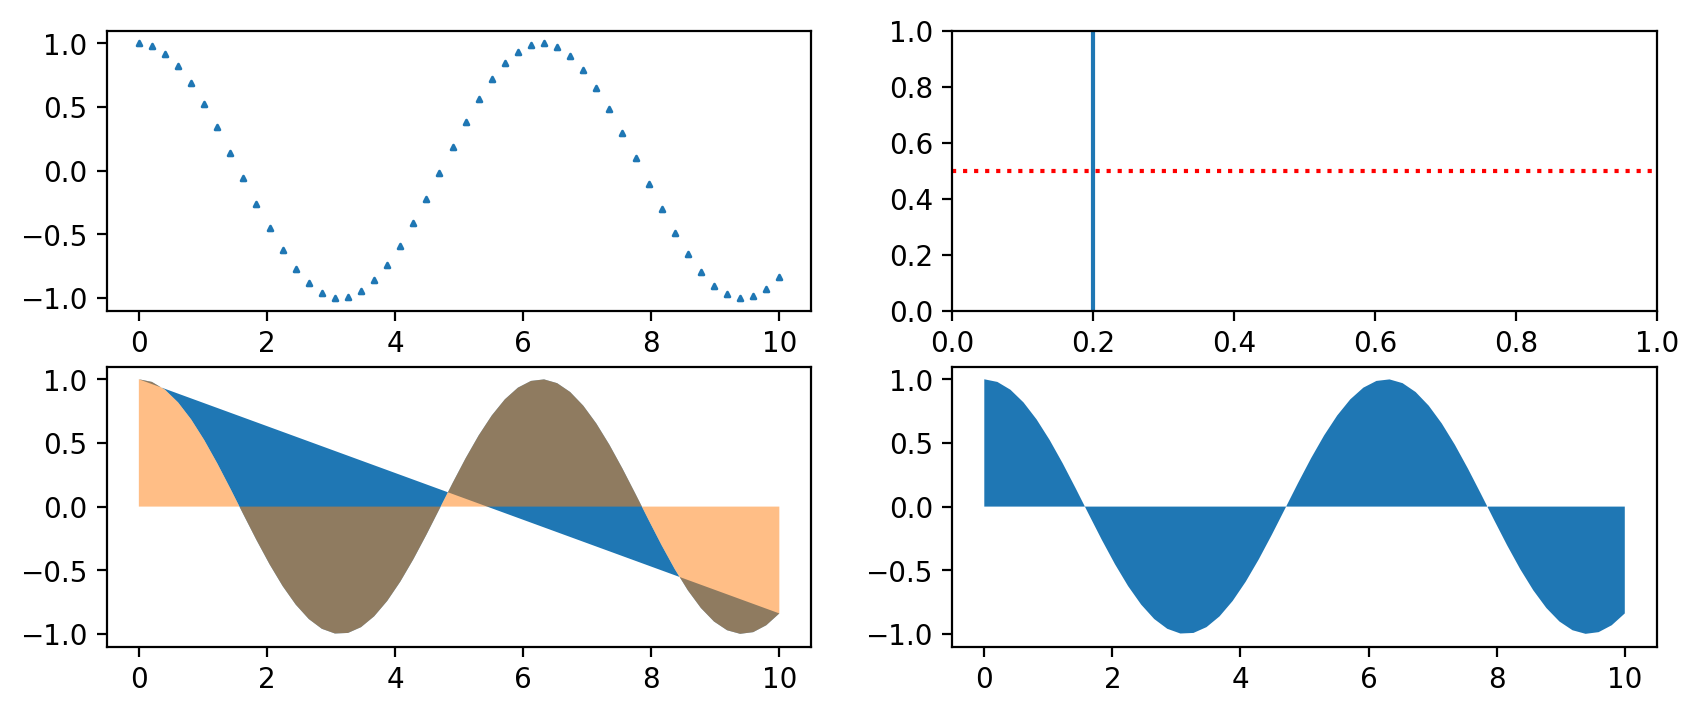

In [68]:
x=np.linspace(0,10) # 0부터 10까지 일정한 간격으로 50(기본값)개 추출
y= np.cos(x)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,4))
axes[0,0].scatter(x,y,s=3,marker='^')
axes[0,1].axvline(0.2)
axes[0,1].axhline(0.5, color='r', linestyle=':')
axes[1,0].fill(x,y)
axes[1,0].fill_between(x,y, alpha=0.5)
axes[1,1].fill_between(x,y)

### 5) pie
- 1차원

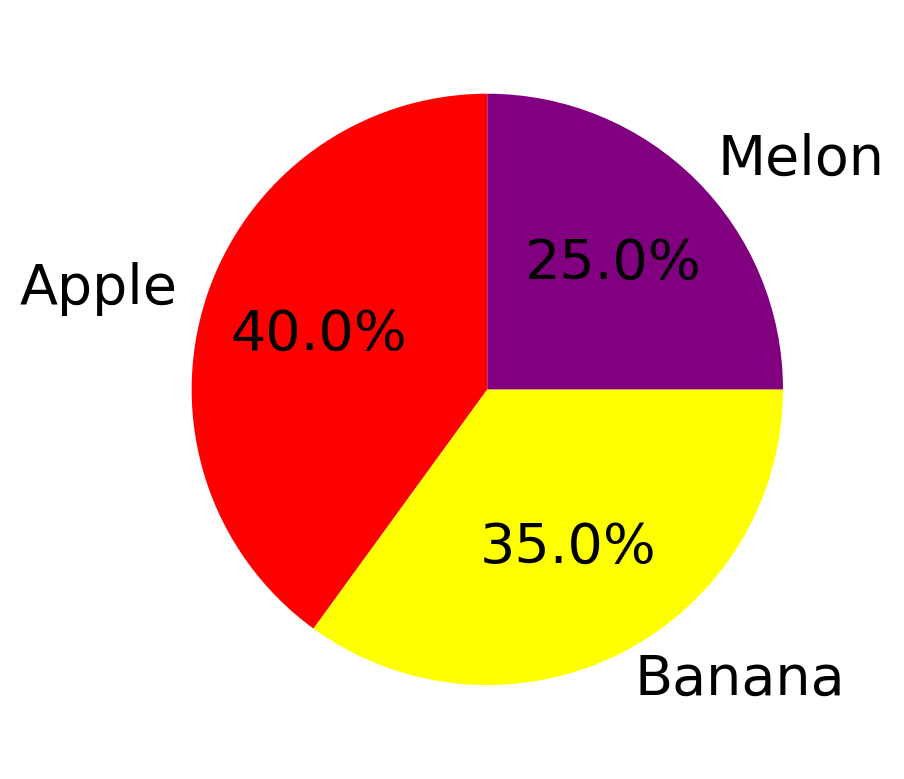

In [77]:
x=[ 40 , 35, 25]
labels = ['Apple', 'Banana','Melon']
colors=['red','yellow','purple']
plt.pie(x, labels= labels, autopct = '%.1f%%', startangle = 90, textprops={'fontsize':20}, colors= colors)
plt.show()

 ## 1.6 그래프 커스터마이징 https://matplotlib.org/stable/api/axes_api.html#text--andand--annotationsannotations
### 1) linestyle, linewidth, color,marker
### 2) text()

In [94]:
#  한글 기본 폰트 설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
# plt.('font', family='Apple Gothic')  #mac
plt.rc('axes', unicode_minus=False) # 축의 - 꺠짐 방지

In [100]:
# 한글 특정 폰트 설정
from matplotlib.font_manager import FontProperties
font_file = r'C:\Windows\Fonts\H2GSRB.TTF' # 네이버폰트, 구글폰트 다운후 사용 가능
font_prop= FontProperties(fname=font_file,size=15)

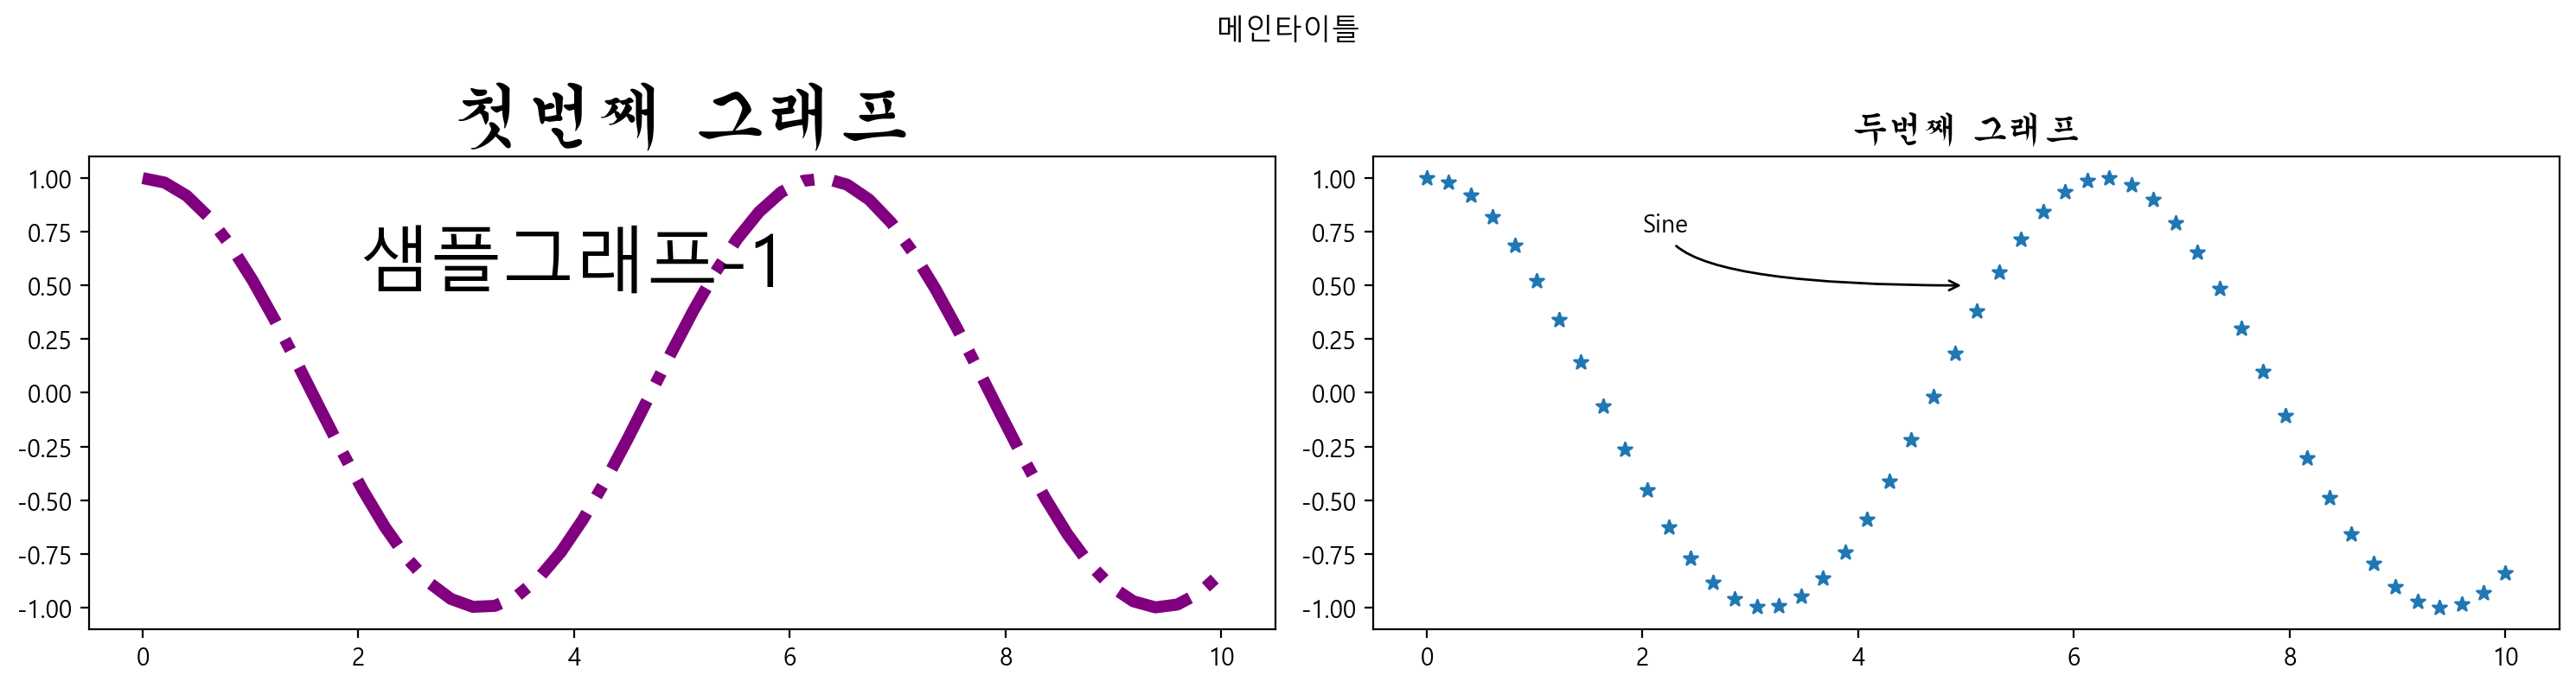

In [111]:
x=np.linspace(0,10) # num
y= np.cos(x)
# warnings.filterwarnings(action='default') # warning 띄우기
fig, axes = plt.subplots(ncols=2, figsize=(15,4))
axes[0].plot(x,y,linewidth=5,linestyle='-.', color='purple')
axes[0].text(2, 0.5, '샘플그래프-1', fontsize=30)
axes[0].set_title('첫번째 그래프', fontproperties=font_prop, fontsize=30)

axes[1].scatter(x,y, marker='*')
axes[1].annotate('Sine', xytext=(2, 0.75), # 글자와 글자가 있을 좌표
                xy=(5,0.5), # 화살표가 기리킬 좌표
                arrowprops=dict(arrowstyle='->', 
                                connectionstyle='angle3') # angle3, angle, arc
                )
axes[1].set_title('두번째 그래프', fontproperties=font_prop)
plt.suptitle('메인타이틀') # 서브플롯 레이아웃 조정
plt.tight_layout()
plt.show()

### 3) 수학 기호
- https://matplotlib.org/2.0.2/users/mathtext.html (교안 30page)

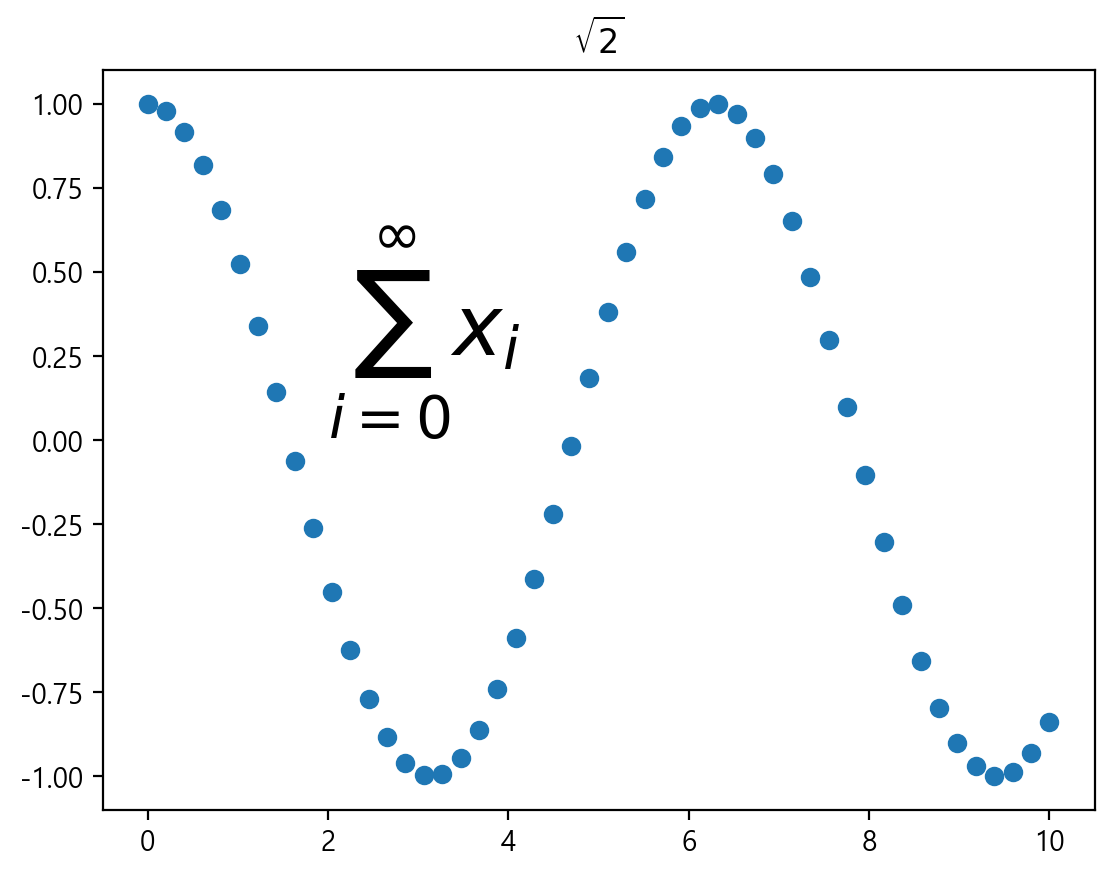

In [115]:
plt.scatter(x,y)
plt.text(2,0.25, r'$\sum_{i=0}^\infty x_i$', fontsize=30)
plt.title(r'$\sqrt{2}$')
plt.show()

### 4) 축과 눈금
- https://matplotlib.org/3.1.0/api/axis_api.html (교안 33page)

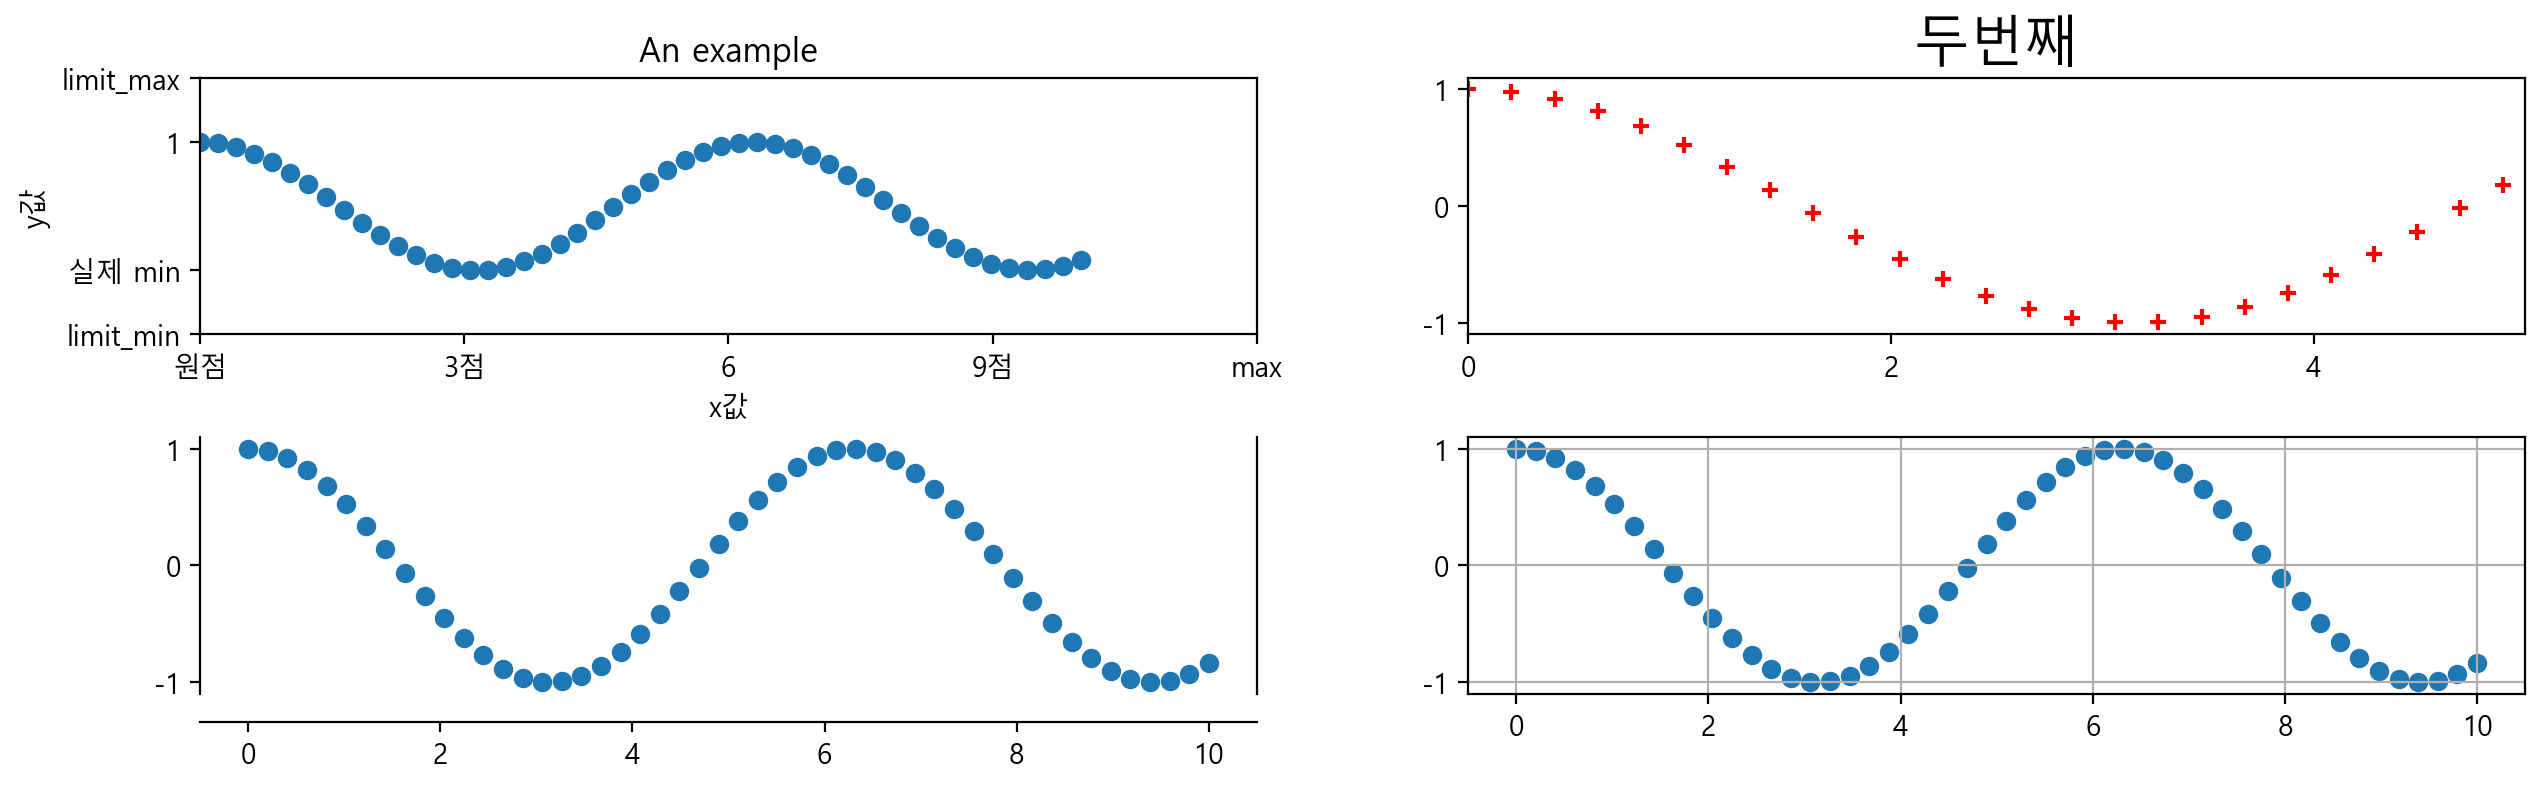

In [135]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(15,4))
# 서브플롯끼리 여백 조정(title, x축 label)
plt.subplots_adjust(hspace=0.4, wspace=0.2) # hspace(위아래여백, 1은 서브플롯 높이)
                                            # wspace(좌우여백, 1은 서브플롯너비)
axes[0,0].scatter(x,y)
axes[0,0].set(title='An example',
              ylabel='y값', xlabel='x값',
              xlim = [0,12], # x축 눈금 범위
              xticks = [0, 3, 6, 9, 12], # x축 눈금
              xticklabels = ['원점', '3점', 6, '9점', 'max'], # x축 눈금 라벨
              ylim = [-2, 2],
              yticks = [-2, -1, 1, 2],
              yticklabels = ['limit_min', '실제 min', 1, 'limit_max']
              )
axes[0,1].scatter(x,y, color='r', marker='+')
axes[0,1].set_title('두번째', fontsize=20)
axes[0,1].set_xlim([0,5])
axes[0,1].set_xticks(range(0,6,2))
axes[1,0].scatter(x,y)
axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['bottom'].set_position(('outward',10)) # 10pt만큼 바깥쪽으로 이동
axes[1,1].scatter(x,y)
axes[1,1].grid(True)
plt.show()

### 5) 축 공유 ★

In [136]:
x = np.arange(0,10)
y1 = 0.5 * x ** 2
y2 = -y1

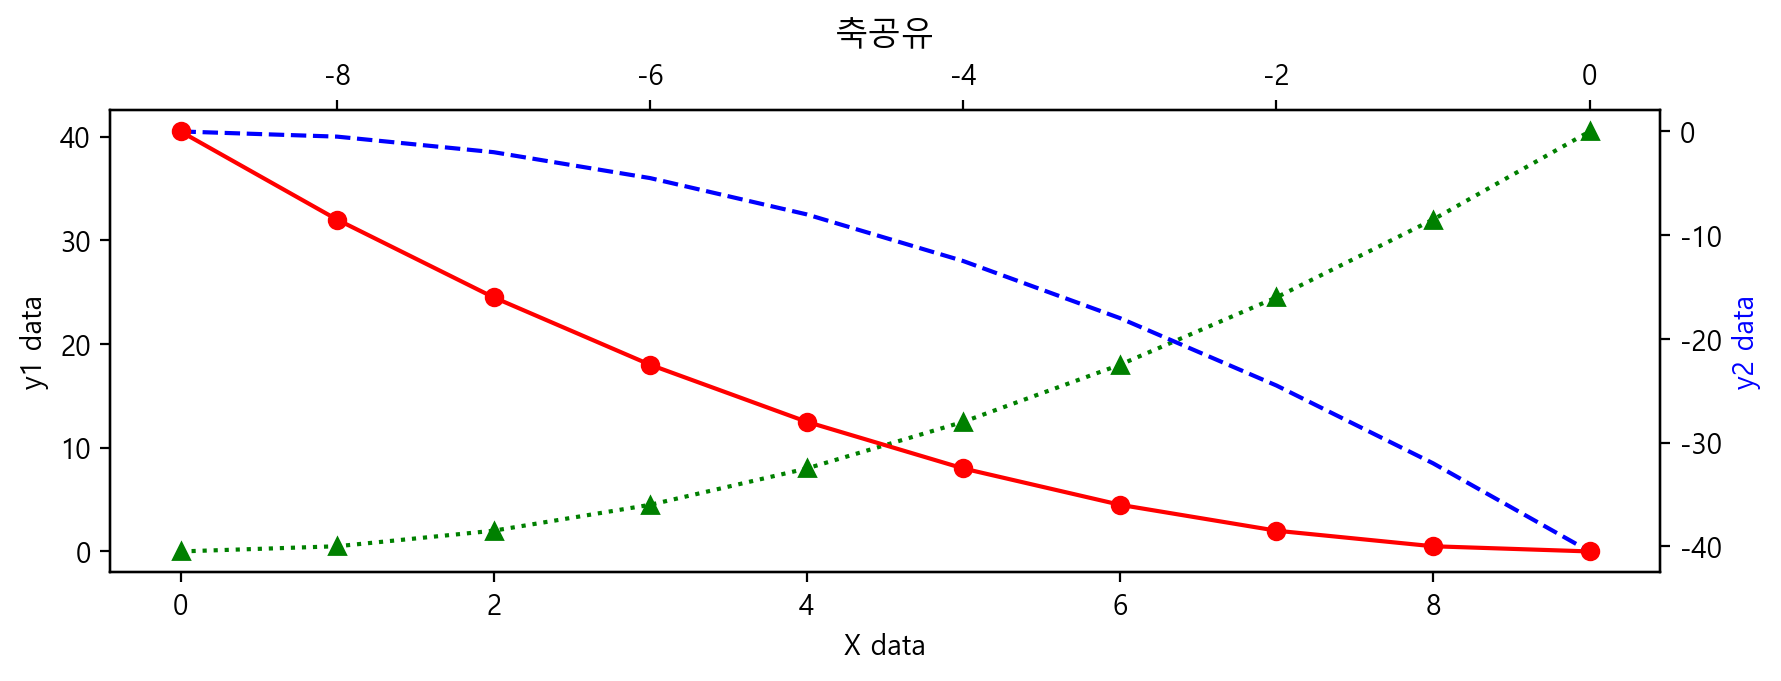

In [150]:
fig, ax1 = plt.subplots(figsize=(10,3))
ax1.plot(x,y1, 'g^:')
ax1.set(title='축공유', xlabel = 'X data', ylabel = 'y1 data')

ax2=ax1.twinx() # ax1과 x축을 공유하는 ax2
ax2.plot(x,y2,'b--')
ax2.set_ylabel('y2 data', color='b')

ax3 = ax1.twiny() # ax1과 y축을 공유하는 ax3
ax3.plot(-x,y1,'ro-')
plt.show()

### 6) 범례표시
### 7) 플롯 스타일 지정

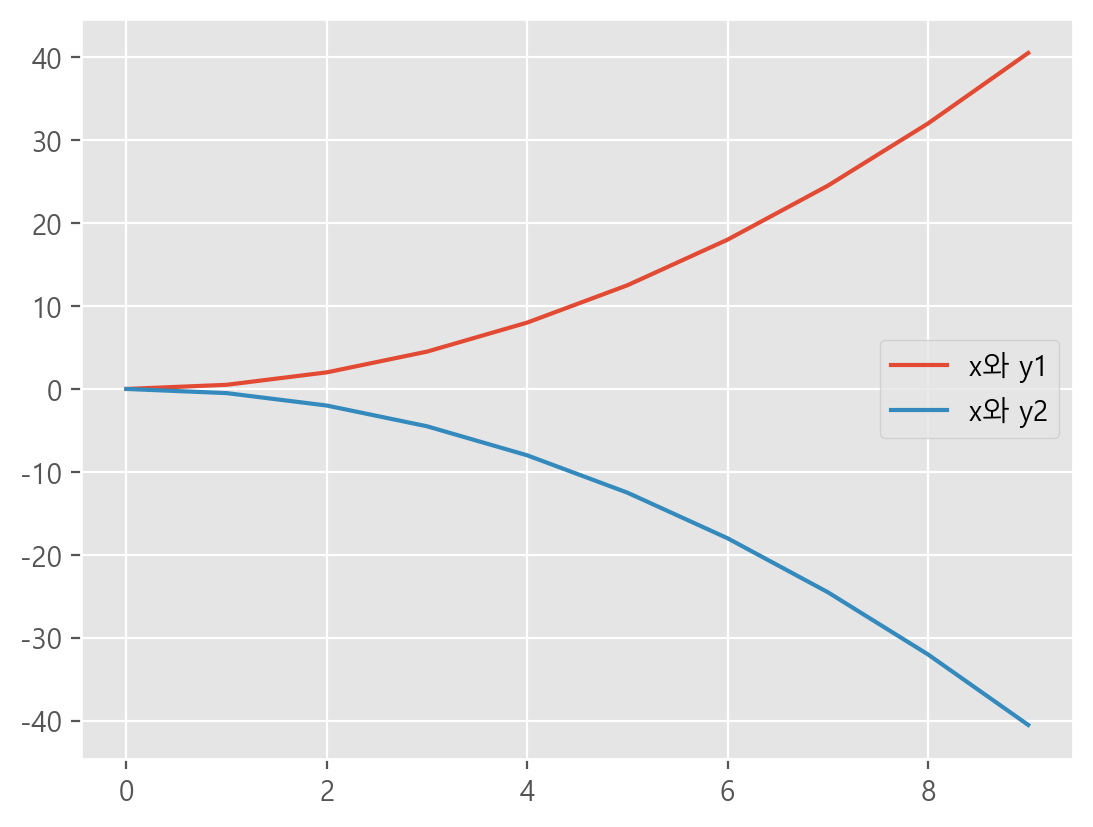

In [156]:
plt.style.use('ggplot') # default,ggplot,classic,.....
plt.plot(x,y1,label='x와 y1')
plt.plot(x,y2,label='x와 y2')
plt.legend(loc='center right')
plt.show()